# Diagrams Overview

Several package exists that support the generation of diagrams from simple text descriptions of them. Through the creation of simple magics, we can use cell block magic to configure a code cell to accept these various description types and then render diagrams directly from them.

By including the the textual generator script in the source document, output assets can be generated in situ. Updating or maintaining the inages takes place in the context within which the asset is used, minimising opportunities for the asset and the surrounding text context to become disjointed.

The availability of simple text descriptions of a diagram, from which diagrams are typically rendered according to a fixed convention (although layout algorithms may determine the specific location of diagram components within a particular diagram) might also be used as mimimally sufficient text description of many key features of the diagram.

Currently, meaningful human readable "long description" text descriptions to support accessibility are *not* generated from the original generative text descritptions, but the potential is there for such development if the will is there to exploit it.

## Blockdiag Package Diagrams

The [`blockdiag`](http://blockdiag.com/en/) package provides tools for generating several types of diagram, from simple box and arrows diagrams to various disgrams familiar to communications and system engineers.

The diagrams are defined using simple text structures. Various IPython block magics allow these descriptions to be entered direclty in to a magicked code cell, and the diagram generated diectly therefrom.

The diagrams are generated by default as SVG diagrams and can be saved to a named file if requierd; `.png `format images may also be created.

All the magics are enabled from a single load command:

In [1]:
%load_ext blockdiag_magic

### Block Diagrams

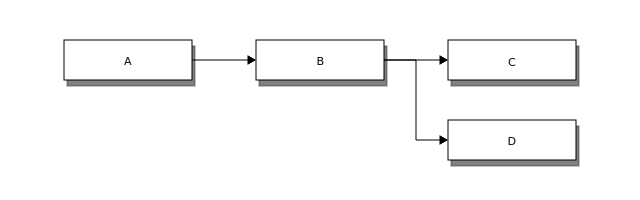

In [2]:
%%blockdiag
A -> B -> C;
B -> D;

### Network Diagrams

TO DO

In the following diagram, we save the SVG image to an explicit file as an additional output. (The direct output is hidden using a publishing system tag in the original soruce document.)

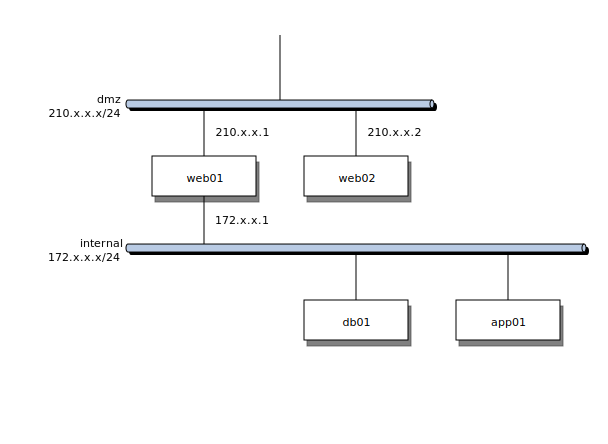

In [3]:
%%nwdiag --outfile demo1.svg
{
  network dmz {
      address = "210.x.x.x/24"

      web01 [address = "210.x.x.1"];
      web02 [address = "210.x.x.2"];
  }
  network internal {
      address = "172.x.x.x/24";

      web01 [address = "172.x.x.1"];
      db01;
      app01;
  }
}

We can then explictly render the image, from the saved file, as required:

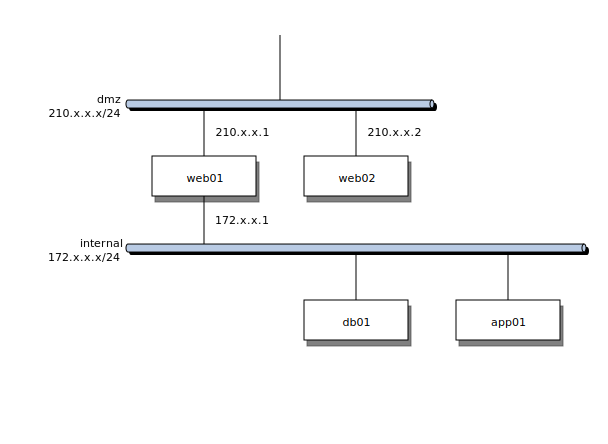

In [4]:
from IPython.display import SVG
SVG('demo1.svg')

In [5]:
## 

#%pip install git+https://github.com/innovationOUtside/flowchart_js_jp_proxy_widget

Import the `jp_flowchartjs` package, which automatically registers the magic:

In [6]:
import jp_flowchartjs.jp_flowchartjs

We can now create simpe description of the flow chart and render it directly:

In [7]:
%%flowchart_magic

st=>start: Start
e=>end: End
op1=>operation: Generate
op2=>parallel: Evaluate
st(right)->op1(right)->op2
op2(path1, top)->op1
op2(path2, right)->e

FlowchartWidget(status='deferring flush until render')

We can also create more complext flowcharts:

In [8]:
%%flowchart_magic
st=>start: Start
e=>end: End
op1=>operation: Set counter to 0
op2=>operation: Draw side code
op3=>operation: Turn ninety degrees code
op4=>operation: Add 1 to counter
cond=>condition: Is counter < 4?
st(right)->op1(right)->op2->op3->cond
cond(yes, right)->op2
cond(no, bottom)->e

FlowchartWidget(status='deferring flush until render')

## Other js Diagramming Tools

A variety of javascript based text to diagram tools exist that are not currently natively supported by Jupyer notebook extensions or magics. However, if the will were there, it should not be too hard to make them play nicely with Jupyer notebooks in a similar way to the examples provided above.

- [`js-sequence-diagrams`](https://bramp.github.io/js-sequence-diagrams/);
- [`mermaid.js`](https://mermaid-js.github.io/mermaid/#/)
- [timing diagrams](https://wavedrom.com/)
- supporting diagramming generation via markdown fenced code blocks using [*Markdown preview enhancdd*](https://shd101wyy.github.io/markdown-preview-enhanced/#/) VS Code extension.